In [1]:
# f(n) - defines a supply schedule
# k - decay constant makes it a dutch auction by decreasing price over time

## A consequence of the VRGDA objective is that if the th NFT is purchased 
# exactly at the target time according to its issuance schedule, its price will be target price.
def simulate_vrgda(base_price, total_time, f, inv_f, k, buys):
    buy_index = 0
    times = []
    prices = []
    bought = []
    target = []
    total_bought = 0
    for time_step in range(round(total_time)):
        if buy_index < len(buys):
            buy_time, buy_amount = buys[buy_index]
            if time_step >= buy_time:
                total_bought += buy_amount
                buy_index += 1
        times.append(time_step)
        bought.append(total_bought)
        target.append(f(time_step))
        prices.append(base_price * (1 - k)**(time_step - inv_f(total_bought)))
    return times, prices, bought, target

In [2]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

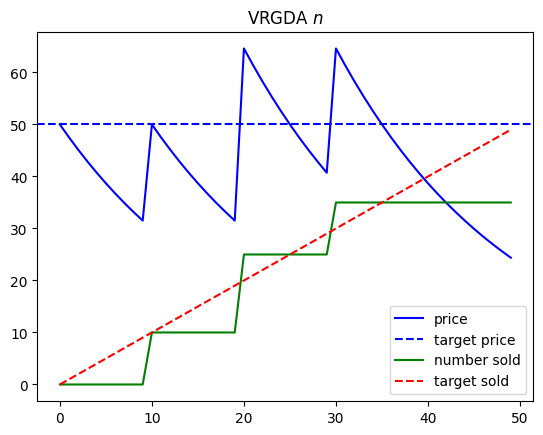

In [13]:
buys=[(10, 10), (20, 15), (30, 10)]
times, prices, bought, target  = simulate_vrgda(50, 50, lambda n: n, lambda n: n, 0.05, buys)
plt.plot(times, prices, 'b')
plt.axhline(y = 50, color = 'b', linestyle = '--')
plt.plot(times, bought, 'g')
plt.plot(times, target, 'r', linestyle='--')
plt.title('VRGDA $n$')
plt.legend(['price', 'target price', 'number sold', 'target sold'])

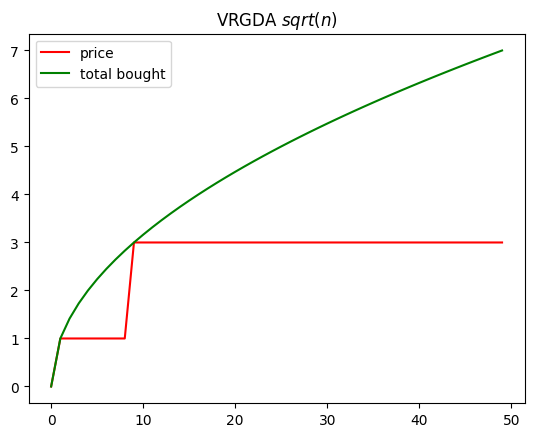

In [4]:
#buy = (time, amount)
buys = [(1, 1),(9,2),()]
times, prices, bought, target  = simulate_vrgda(10, 50, lambda n: n**0.5, lambda n: n**2, 0.05, buys)
#plt.plot(times, prices, 'b')
plt.plot(times, bought, 'r')
plt.plot(times, target, 'g')
plt.title('VRGDA $sqrt(n)$')
plt.legend(['price', 'total bought', 'target sold'])

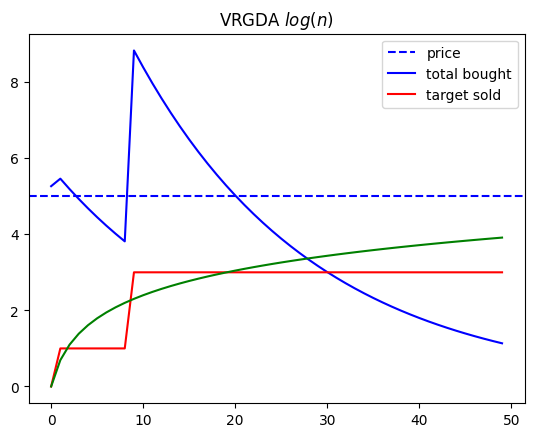

In [5]:
#buy = (time, amount)
buys = [(1, 1),(9,2)]
times, prices, bought, target  = simulate_vrgda(5, 50, lambda n: math.log(n+1), lambda n: math.e**n, 0.05, buys)
plt.axhline(y = 5, color = 'b', linestyle = '--')
plt.plot(times, prices, 'b')
plt.plot(times, bought, 'r')
plt.plot(times, target, 'g')
plt.title('VRGDA $log(n)$')
plt.legend(['price', 'total bought', 'target sold'])